## Importing Library


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_excel('asset/age-income.xlsx')
df

,age,Income
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65
5,21,62
6,25,65
7,30,70
8,31,68


## Plot with this value

Text(0.5, 1.0, 'Income vs Age')

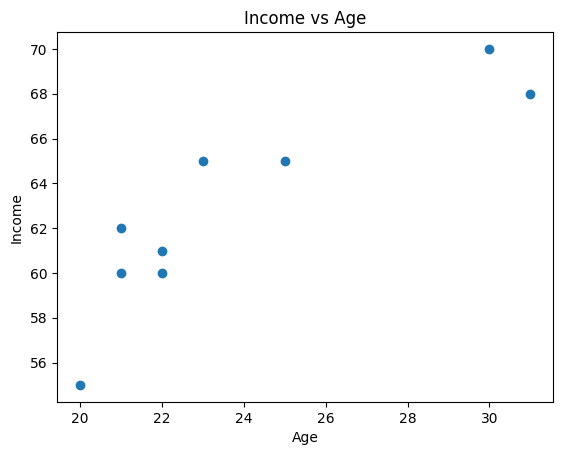

In [24]:
plt.scatter(df[['age']],df[['Income']])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age')

In [41]:
x=df[['age']]
x

,age
0,21
1,20
2,22
3,22
4,23
5,21
6,25
7,30
8,31


In [39]:
y=df['Income']
y

0    60
1    55
2    60
3    61
4    65
5    62
6    65
7    70
8    68
Name: Income, dtype: int64

## Task 01:
#### Your objective is to implement the K-Nearest Neighbors (KNN) algorithm with k=3. Use this algorithm to predict the income value, with the given input value X=22.

### Using sklearn.neighbors.KNeighborsRegressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x,y)
knr.predict([[22]])

c:\Users\Sadika Sharmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([60.33333333])

### Using lenear Regression to validate the KNN calculations. 

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y) 
reg.predict([[22]])

c:\Users\Sadika Sharmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.97068966])

## result:
=======
#### Using KNN algorithm = array([[60.33333333]])
#### Using Linear Regression algorithm = array([[60.97068966]])

## Compare the predicted outcomes of the KNN algorithm with Linear Regression results

In [72]:

df.drop("prid_linear_reg", axis=1, inplace=True)

In [68]:
df['predict_income_knn'] = knr.predict(x)

In [73]:
df['predict_income_linear_reg'] = reg.predict(x)
df

,age,Income,predict_income_knn,predict_income_linear_reg
0,21,60,59.000000,59.955172
1,20,55,59.000000,58.939655
2,22,60,60.333333,60.970690
3,22,61,60.333333,60.970690
4,23,65,62.000000,61.986207
5,21,62,59.000000,59.955172
6,25,65,63.333333,64.017241
7,30,70,67.666667,69.094828
8,31,68,67.666667,70.110345


Text(0.5, 1.0, 'Error of predict_income_knn and predict_income_linear_reg')

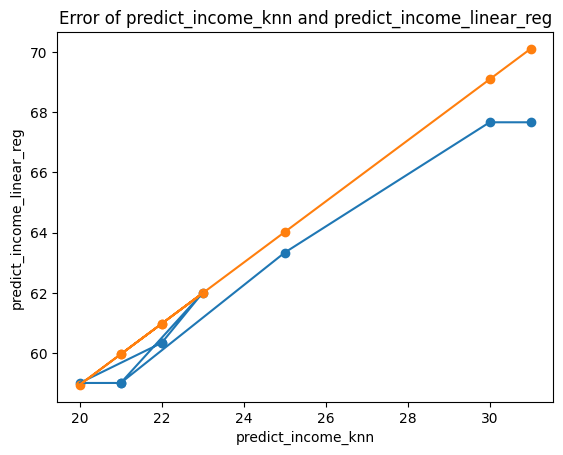

In [78]:
plt.scatter(df[['age']],df[['predict_income_knn']])
plt.scatter(df[['age']],df[['predict_income_linear_reg']])
plt.plot(df[['age']],df[['predict_income_knn']])
plt.plot(df[['age']],df[['predict_income_linear_reg']])
plt.xlabel('predict_income_knn')
plt.ylabel('predict_income_linear_reg')
plt.title('Error of predict_income_knn and predict_income_linear_reg')


### MSE & MAE for KNN Algorithm

In [79]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x, df['predict_income_knn'])
mse

1455.7283950617284

In [80]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(x, df['predict_income_knn'])
mae

38.14814814814815

### MSE & MAE for Linear Algorithm

In [81]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x, df['predict_income_linear_reg'])
mse

1521.003448275862

In [82]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(x, df['predict_income_linear_reg'])
mae

39.0

In [83]:
df.to_excel('asset/output.xlsx')